## AutoEncode 노이즈 제거
---
- 데이터 노이즈 제거에 활용
- 데이터에서 주요 특징만 추출, 압축하기 때문에 노이즈는 주요 특징에서 제거됨
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [39]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩
---

In [40]:
# load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환
mnist = load_data()
(X_train, y_train), (X_test, y_test) = load_data()
print(f'X_train.shape : {X_train.shape}\ny_train.shape : {y_train.shape}')
print(f'X_test.shape  : {X_test.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
X_test.shape  : (10000, 28, 28)
y_test.shape  : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환

In [41]:
# 스케일링 => 픽셀 / 255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [42]:
# Dense로 1차원을 넣어야 하기 때문에
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)   

In [43]:
print(f'X_train.shape : {X_train.shape}\nX_test.shape  : {X_test.shape}')
print(f'y_train.shape : {y_train.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (60000, 784)
X_test.shape  : (10000, 784)
y_train.shape : (60000,)
y_test.shape  : (10000,)


In [44]:
# 노이즈 삽입 : 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
X_train_noised = X_train + np.random.normal(0, 0.5, size = X_train.shape)
X_test_noised = X_test + np.random.normal(0, 0.5, size = X_test.shape)

# 값 변환 : 각 픽셀의 범위를 0.0 - 1.0으로 맞춰 주기 위해 조정
# np.clip(array, min, max)
X_train_noised = np.clip(X_train_noised, a_min=0, a_max=1)
X_test_noised = np.clip(X_test_noised, a_min=0, a_max=1)

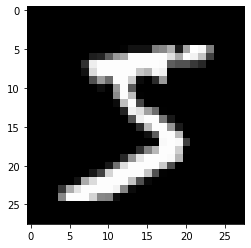

In [45]:
# 원본 데이터
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()

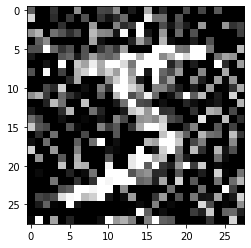

In [46]:
# 노이즈 추가 데이터
plt.imshow(X_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

## [3] 모델 구성 및 생성

In [47]:
# 노드 수 조절하도록 모델 만드는 함수
def createAEModel(n_node):
    model = Sequential()
    # 입력 (784)
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))  # 입력되는 노드수는 정해져있즤오
    # 출력 (784)
    model.add(Dense(784, activation='sigmoid')) # 784같은 수는 변수로 둠
    model.compile(loss='mse', optimizer = 'adam', metrics='accuracy')
    return model   

In [24]:
# binary crossentropy 바꾸는 것도 해보기 (x)

In [48]:
oneModel = createAEModel(100)
twoModel = createAEModel(300)
thrModel = createAEModel(500)

In [26]:
# 시각화
# plot_model(oneModel, show_shapes=True)

- 과정 진행 -> 노이즈 제거 효과가 있다고 했으니
- 은닉층 개수 조절 -> 노이즈 제거 차이 보고

## [4] 모델 학습

In [49]:
### X값, y값 모두 입력 데이터로 (X도 내꺼, y도 내꺼)
import tensorflow as tf
with tf.device("/device:CPU:0"):
    print('CPU')
    oneModel.fit(X_train_noised, X_train, epochs=10)
    twoModel.fit(X_train_noised, X_train, epochs=10)
    thrModel.fit(X_train_noised, X_train, epochs=10)
# with tf.device("/device:GPU:0"):
#     oneModel.fit(X_train_noised, X_train, epochs=10)
#     twoModel.fit(X_train_noised, X_train, epochs=10)
#     thrModel.fit(X_train_noised, X_train, epochs=10)

CPU
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0306 - accuracy: 0.0103
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.0109
Epoch 3/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.0167 - accuracy: 0.0124
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0160 - accuracy: 0.0139
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0156 - accuracy: 0.0142
Epoch 6/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0153 - accuracy: 0.0148
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0151 - accuracy: 0.0146
Epoch 8/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.0149 - accuracy: 0.0153
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0148 - accuracy: 0.0155
Epoch 10/10
1875/1875 [==============================] - 2s 982us/step -

In [50]:
oneModel.evaluate(X_test_noised, X_test)
twoModel.evaluate(X_test_noised, X_test)
thrModel.evaluate(X_test_noised, X_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.0146


[0.013358958065509796, 0.014600000344216824]

## [5] 예측
---
- 새로운 데이터 사용

In [51]:
# 입력에 들어가는 값이 그대로 y값으로 들어가는 것
pre1 = oneModel.predict(X_train_noised[0].reshape(-1,784))
pre2 = twoModel.predict(X_train_noised[0].reshape(-1,784))
pre3 = thrModel.predict(X_train_noised[0].reshape(-1,784))

1/1 [==============================] - 0s 31ms/step


In [52]:
pre1.shape
pre2.shape
pre3.shape

(1, 784)

## 원본 이미지 - AE 진행된 이미지 비교

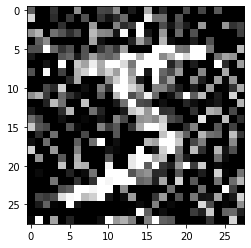

In [53]:
plt.imshow(X_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

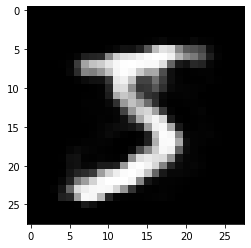

In [54]:
plt.imshow(pre1.reshape(28,28), cmap='gray')
plt.show()

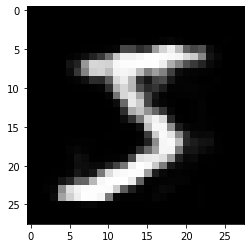

In [55]:
plt.imshow(pre2.reshape(28,28), cmap='gray')
plt.show()

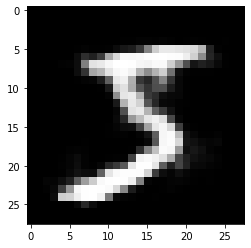

In [56]:
plt.imshow(pre3.reshape(28,28), cmap='gray')
plt.show()

In [35]:
# 300개나 500개나 비슷하다면 => 300개를 선택해야제